In [1]:
#importing basic python Libraries for data science work 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing raw annual files
#These files contain a sheet for each year
bus_2017 = pd.ExcelFile('2017.xlsx')
bus_2018 = pd.ExcelFile('2018.xlsx')
bus_2019 = pd.ExcelFile('2019.xlsx')



In [3]:
#initializing arrays for months
months17 = np.array(bus_2017.sheet_names)
months18 = np.array(bus_2018.sheet_names)
months19 = np.array(bus_2019.sheet_names)


In [4]:
# Create a dataframe to append all the sheets of 2017
bus_17 = pd.DataFrame()


for sheet in months17:
    
    # Read in the dataframe
    df = pd.read_excel(bus_2017, sheet)
    
    # Append the dataframe onto our 2017 dataframe
    bus_17 = pd.concat([bus_17, df])

In [5]:
bus_17.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2017-01-01,73,00:42:00,Sunday,Claireport at Albion,Mechanical,20.0,20.0,S,8091.0
1,2017-01-01,75,01:02:00,Sunday,Glen /Elm,Emergency Services,30.0,60.0,n,1821.0
2,2017-01-01,102,01:20:00,Sunday,Warden Station,Mechanical,10.0,20.0,NaN,8114.0
3,2017-01-01,120,01:22:00,Sunday,Sheppard at Northover,Mechanical,30.0,60.0,e,8548.0
4,2017-01-01,83,01:30:00,Sunday,Donlands station,Mechanical,30.0,60.0,NaN,8127.0


In [6]:
# Create a dataframe to append all the sheets of 2018
bus_18 = pd.DataFrame()


for sheet in months18:
    
    # Read in the dataframe 
    df = pd.read_excel(bus_2018, sheet)
    
    # Append the dataframe onto our 2018 dataframe
    bus_18 = pd.concat([bus_18, df])

In [7]:
bus_18.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


In [8]:
# Create a dataframe to append all the sheets of 2019
bus_19 = pd.DataFrame()


for sheet in months19:
    
    # Read in the dataframe 
    df = pd.read_excel(bus_2019, sheet)
    
    # Append the dataframe onto our 2019 dataframe
    bus_19 = pd.concat([bus_19, df])

In [9]:
bus_19.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Incident ID
0,2019-01-01,39,00:13:00,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0,NaN
1,2019-01-01,111,00:15:00,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0,NaN
2,2019-01-01,35,00:18:00,Tuesday,Finch,Mechanical,9.0,18.0,S/B,3275.0,NaN
3,2019-01-01,25,00:30:00,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,8840.0,NaN
4,2019-01-01,36,00:40:00,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,9119.0,NaN


In [10]:
#Reset index to ensure the concatination is done smoothly
bus_17.reset_index(inplace = True, drop = True )
bus_18.reset_index(inplace = True, drop = True )
bus_19.reset_index(inplace = True, drop = True )

In [11]:
#intializing an array of dfs
bus_dfs = [bus_17,bus_18,bus_19]

In [12]:
#Creating master df for bus delays
bus_delay = pd.DataFrame()

for year in bus_dfs:
    bus_delay = pd.concat([bus_delay, year])

In [13]:
#reset index
bus_delay.reset_index(inplace = True, drop = True )

The `bus_delay` dataframe is ready to start data wrangling and cleaning.

### Basic EDA

In [14]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206606 entries, 0 to 206605
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report Date  206606 non-null  datetime64[ns]
 1   Route        206606 non-null  int64         
 2   Time         206606 non-null  object        
 3   Day          206606 non-null  object        
 4   Location     206198 non-null  object        
 5   Incident     205671 non-null  object        
 6   Min Delay    206222 non-null  float64       
 7   Min Gap      205780 non-null  float64       
 8   Direction    202056 non-null  object        
 9   Vehicle      171904 non-null  float64       
 10  Incident ID  5144 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 17.3+ MB


In [15]:
#standardizing column names
bus_delay.columns = [i.replace(' ', '_').lower() for i in bus_delay.columns]

In [16]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206606 entries, 0 to 206605
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   report_date  206606 non-null  datetime64[ns]
 1   route        206606 non-null  int64         
 2   time         206606 non-null  object        
 3   day          206606 non-null  object        
 4   location     206198 non-null  object        
 5   incident     205671 non-null  object        
 6   min_delay    206222 non-null  float64       
 7   min_gap      205780 non-null  float64       
 8   direction    202056 non-null  object        
 9   vehicle      171904 non-null  float64       
 10  incident_id  5144 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 17.3+ MB


In [17]:
#Checking nulls
bus_delay.isna().sum()

report_date         0
route               0
time                0
day                 0
location          408
incident          935
min_delay         384
min_gap           826
direction        4550
vehicle         34702
incident_id    201462
dtype: int64

In [18]:
#dropping incident ID for a vast missing values issue
bus_delay = bus_delay.drop(['incident_id'], axis = 1)

In [19]:
#null values for direction of vehicle assigned to 'Not Available'
bus_delay['location'].fillna('not available', inplace = True)

In [20]:
#Not available vehicle number assigned to 9999
bus_delay['vehicle'].fillna(9999, inplace = True)

In [21]:
#Not available incident changed to unknown
bus_delay['incident'].fillna('not available', inplace = True)

In [22]:
#null values for direction of vehicle assigned to unknown
bus_delay['direction'].fillna('unknown', inplace = True)

In [23]:
# Checking Whats left of null values
bus_delay.isna().sum()

report_date      0
route            0
time             0
day              0
location         0
incident         0
min_delay      384
min_gap        826
direction        0
vehicle          0
dtype: int64

In [24]:
bus_delay.shape

(206606, 10)

In [25]:
#dropping all rows with null values now i.e delay or gap data only since that is the primary information
#and they account for a relatively small portion of the entire data
bus_delay = bus_delay.dropna()
bus_delay.reset_index(inplace = True, drop = True )

--- 
## Data Cleaning
----

#### Checking for outliers in the numeric columns

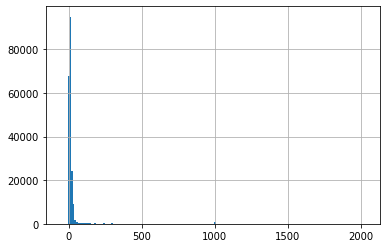

In [26]:
bus_delay.min_delay.hist(bins = 200)

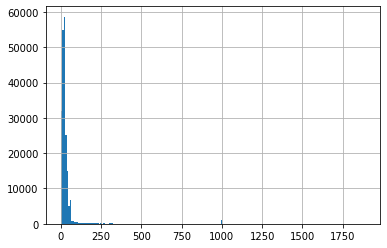

In [27]:
bus_delay.min_gap.hist(bins = 200)

In [28]:
#Dropping outliers for min_delay and min_gap. 
#No bus has a difference of over 1 hr and any delay greater than 90 should be considered as a one-off event
bus_delay.drop(bus_delay[bus_delay.min_delay > 90].index, inplace=True)
bus_delay.drop(bus_delay[bus_delay.min_gap > 60].index, inplace=True)

In [29]:
print('Data shape: ',bus_delay.shape)
print('Total of ' ,206606 - bus_delay.shape[0], 'rows dropped')

Data shape:  (196622, 10)
Total of  9984 rows dropped


### Cleaning direction column

In [30]:
#Checking top 25 value count of directions
bus_delay['direction'].value_counts().head(25)

N/B        32440
S/B        29956
E/B        28620
B/W        27382
W/B        26793
unknown     4410
BW          4236
EB          3799
NB          3625
WB          3528
N           3406
W           3395
E           3285
SB          3033
S           2837
n           1649
s           1451
n/b         1124
nb          1008
w           1006
s/b          994
sb           929
e            849
bw           832
eb           797
Name: direction, dtype: int64

Apparently, there are 466 ways to write 4 directions. We need to fix this.

In [31]:
#Make all data lowercase in the direction column
bus_delay['direction'] = [i.replace(' ', '').lower() for i in bus_delay['direction']]

In [32]:
bus_delay['direction'] = bus_delay['direction'].replace(['e', 'e/b', 'eb','be', 'easts', 'est', 'w/e', 'we'], 'east')

bus_delay['direction'] = bus_delay['direction'].replace(['w', 'w/b', 'wb', 'bw', 'b/w', 'o/b', 'wests', 'ob', 'e/w',
                                                        'ew'], 'west')

bus_delay['direction'] = bus_delay['direction'].replace(['nb', 'n', 'n/b', 'bn', 'up', 'sn'], 'north')

bus_delay['direction'] = bus_delay['direction'].replace(['s', 's/b', 'sb', 'bs', 'dn', 'down', 'n/s'], 'south')

In [33]:
mapping = {'east': 'east', 'south':'south', 'west':'west', 'north':'north'}
bus_delay['direction'] = bus_delay['direction'].map(mapping)

In [34]:
bus_delay.isna().sum()

report_date       0
route             0
time              0
day               0
location          0
incident          0
min_delay         0
min_gap           0
direction      5281
vehicle           0
dtype: int64

In [35]:
#null values for direction of vehicle assigned to unknown
bus_delay['direction'].fillna('unknown', inplace = True)

In [36]:
bus_delay['direction'].value_counts()

west       69766
north      43839
south      39747
east       37989
unknown     5281
Name: direction, dtype: int64

In [37]:
#Changing data type to integer for Vehicle coumn
bus_delay['vehicle'] = bus_delay['vehicle'].astype('int')

## Lets start cleaning the location column (54287 Unique entries)

In [38]:
bus_delay.location.value_counts().shape

(50809,)

In [39]:
bus_delay.location.value_counts().head(25)

STC                        2942
Finch Station              2380
Entire Route               2099
Kennedy Station            2033
Warden Station             1746
Kipling Station            1586
Wilson Station             1288
Eglinton Station           1255
Main Station               1196
Victoria Park Station       916
Entire route                904
FSTN                        818
Pape Station                801
Eglinton Yard               759
York Mills Station          753
Finch Stn                   730
ESTN                        712
Kennedy STN                 712
KENN                        690
Keele Station               666
Scarborough Town Centre     625
Kennedy station             616
Broadview Station           602
Pioneer Village Station     598
Sheppard West Station       589
Name: location, dtype: int64

#### Standardize the data entries

In [40]:
#Standardizing some separators that were used to separate words e.g st. clair would turn into st_clair
#iterated over a long range of value counts to pick up on common separators used 
bus_delay['location'] = [i.replace(' ', '_').lower() for i in bus_delay['location']]
bus_delay['location'] = [i.replace('  ', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('.', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace("'", '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('__', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('___', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_-_', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('-', '_') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('--', '_') for i in bus_delay['location']]

#Standardizing some common seprators that were translating to intersection 
bus_delay['location'] = [i.replace('_nd_', '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_and_' , '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_/_', '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_&_', '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_at_', '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('_on_', '/') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('/on_', '/') for i in bus_delay['location']]


In [41]:
bus_delay.location.value_counts()

entire_route                                3807
stc                                         3119
kennedy_station                             2854
warden_station                              2723
finch_station                               2653
                                            ... 
sheppard/arleta_ave_                           1
eglinton_ave/overlea_blvd/don_mills_road       1
steeles_ave/kelvin_grove_ave                   1
vic_park_to_steeles                            1
bloor_street_west/kpsn                         1
Name: location, Length: 37193, dtype: int64

In [42]:
#Changing some common abrevations noticed
bus_delay['location'] = [i.replace('stn', 'station') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('stations', 'station') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('stationq', 'station') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('stn_', 'station') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('station_', 'station') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('young', 'yonge') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('young_', 'yonge') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('ave.', 'avenue') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('ave_', 'avenue') for i in bus_delay['location']]
bus_delay['location'] = [i.replace('street', 'st') for i in bus_delay['location']]

In [43]:
bus_delay.location.value_counts()

kennedy_station                        4382
entire_route                           3807
finch_station                          3776
warden_station                         3745
kipling_station                        3267
                                       ... 
danforth_avenueto_commissioners_st_       1
sheppard/beecroft_road                    1
warden_stationto_coxwell_station          1
eglinton_avenueto_st_clair_ave            1
victoria_park/sweeney                     1
Name: location, Length: 36521, dtype: int64

##### A significant drop in unqiue from 54,287 to 39,104 values simply due to standardization. A drop of more than 15,000 enteries.

---

#### Looking closely at the location column we can see most of the bus stops are listed as `street1/street2` since they are in no specific order we will organize them alphabetically to avoid any duplicates.

In [44]:
bus_delay.reset_index(inplace= True, drop = True)

In [45]:
bus_delay.location = bus_delay.location.astype('str')

In [46]:
#separate them by '/' and then sort it
bus_delay.location = bus_delay.location.str.split('/')
for i in np.arange(0, (bus_delay.shape[0])):
    bus_delay.location[i].sort()

In [47]:
#join the sorted street names back 
c = bus_delay.location
bus_delay.location = [['/'.join(i)] for i in c]

In [48]:
#Convert array into a string
for i in np.arange(0, (bus_delay.shape[0])):
    bus_delay.location[i] = bus_delay.location[i][0]

C:\Users\safiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
bus_delay['location'].value_counts()

kennedy_station          4382
entire_route             3807
finch_station            3776
warden_station           3745
kipling_station          3267
                         ... 
renforth_st                 1
finch/stc_morningside       1
finchley/islington          1
kipling/on_rexdale,         1
lakeshore_blvd              1
Name: location, Length: 33300, dtype: int64

A further improvement of almost 4,000 enteries

#### Digging deeper into locations data to find out  high frequency enteries and group all similar entries into one for better representation

In [50]:
bus_delay.location.value_counts().head(30)

kennedy_station            4382
entire_route               3807
finch_station              3776
warden_station             3745
kipling_station            3267
stc                        3119
eglinton_station           2768
wilson_station             2457
main_station               2074
pape_station               2009
victoria_park_station      1741
keele_station              1561
don_mills_station          1383
eglinton_west_station      1342
broadview_station          1335
york_mills_station         1284
eglinton_yard              1230
lawrence_station           1216
sheppard_west_station      1159
jane_station               1018
pioneer_village_station     886
fstation                    825
lawrence_west_station       807
islington_station           794
ossington_station           779
davisville_station          766
lawrence/pine               739
kenn                        721
scarborough_town_centre     720
estation                    715
Name: location, dtype: int64

In [51]:
#Checking what bus routes are related with fstation (24 highest frequency)
p = bus_delay.where(bus_delay['location'] == 'fstation')

#checking buses routes to see what stations they stop at that might be relevant. 
#e.g fstation is finch station bus 53 leaves from there
p.dropna().head(20)

,report_date,route,time,day,location,incident,min_delay,min_gap,direction,vehicle
989,2017-01-07,53.0,14:25:00,Saturday,fstation,Utilized Off Route,6.0,11.0,east,1148.0
2297,2017-01-13,53.0,01:41:00,Friday,fstation,Emergency Services,19.0,38.0,east,1147.0
2527,2017-01-14,39.0,11:46:00,Saturday,fstation,Investigation,6.0,12.0,east,1086.0
3188,2017-01-19,199.0,00:19:00,Thursday,fstation,Mechanical,9.0,18.0,east,1119.0
3217,2017-01-19,60.0,06:54:00,Thursday,fstation,Late Leaving Garage,7.0,14.0,west,8443.0
4418,2017-01-26,53.0,21:35:00,Thursday,fstation,Mechanical,18.0,39.0,east,1228.0
4962,2017-01-30,39.0,20:44:00,Monday,fstation,Utilized Off Route,16.0,32.0,east,1083.0
5483,2017-02-03,60.0,05:28:00,Friday,fstation,Late Leaving Garage,9.0,24.0,west,8439.0
5596,2017-02-03,199.0,15:48:00,Friday,fstation,Late Leaving Garage,12.0,24.0,east,1215.0
5937,2017-02-06,36.0,14:05:00,Monday,fstation,Mechanical,5.0,10.0,west,9108.0


--- 

### Addressing misspelled location titles with variants using `checkroutes` and `checkexpression` functions

In [52]:
#Generalizing the code above with a function.it will help us find all high freq but illogical names for locations
def checkroutes(location):
    ''' takes location title as a string and produces a subset of dataframe
    that can be used to find routes using that location '''
    
    x = bus_delay.where(bus_delay['location'] == location)
    x = x.dropna().head(30)
    return x

In [53]:
checkroutes('pstation')

,report_date,route,time,day,location,incident,min_delay,min_gap,direction,vehicle
49,2017-01-01,25.0,07:45:00,Sunday,pstation,Mechanical,30.0,35.0,north,7415.0
67,2017-01-01,185.0,11:10:00,Sunday,pstation,Mechanical,10.0,20.0,north,7680.0
181,2017-01-02,185.0,16:30:00,Monday,pstation,Mechanical,10.0,20.0,north,7511.0
9665,2017-02-26,25.0,11:56:00,Sunday,pstation,Mechanical,8.0,16.0,north,7406.0
14613,2017-03-30,185.0,08:35:00,Thursday,pstation,Mechanical,8.0,16.0,north,7580.0
20890,2017-05-05,185.0,17:07:00,Friday,pstation,Mechanical,8.0,16.0,north,7578.0
34646,2017-07-21,185.0,07:07:00,Friday,pstation,Mechanical,8.0,16.0,north,7515.0
36369,2017-07-31,25.0,05:33:00,Monday,pstation,Late Leaving Garage,1.0,1.0,north,8624.0
36379,2017-07-31,185.0,05:58:00,Monday,pstation,Late Leaving Garage,1.0,1.0,north,7455.0
36397,2017-07-31,185.0,06:23:00,Monday,pstation,Utilized Off Route,8.0,16.0,north,7619.0


In [54]:
#Here we checked against different key words to find matching values to narrow down our results. 
# words used e.g. like = station or  like =  loop/queen/broadview/spadina/king/cne/dundas/clai/ronc/les/rus/nev
def checkexpression(expression):
    '''
    Takes a string and searches for similar entries in the locations dataframe created inside the functio.
    expression must be put inside ''. e.g checkexpression('expression')
    '''
    assert isinstance(expression, str), "Please add '' to your expresssion"
    locations = pd.DataFrame(bus_delay['location'].value_counts())
    #locations.reset_index(inplace = True)
    locations = locations.rename(columns={"index": "location", "location": "counts"})
    loop_list = locations.filter(like= expression , axis=0)
    return loop_list.head(30)

In [55]:
bus_delay.location.value_counts().head(30)

kennedy_station            4382
entire_route               3807
finch_station              3776
warden_station             3745
kipling_station            3267
stc                        3119
eglinton_station           2768
wilson_station             2457
main_station               2074
pape_station               2009
victoria_park_station      1741
keele_station              1561
don_mills_station          1383
eglinton_west_station      1342
broadview_station          1335
york_mills_station         1284
eglinton_yard              1230
lawrence_station           1216
sheppard_west_station      1159
jane_station               1018
pioneer_village_station     886
fstation                    825
lawrence_west_station       807
islington_station           794
ossington_station           779
davisville_station          766
lawrence/pine               739
kenn                        721
scarborough_town_centre     720
estation                    715
Name: location, dtype: int64

#### Using the functions above we will allocate all high frequency values to the right location name

In [56]:
checkroutes('estation').head()

,report_date,route,time,day,location,incident,min_delay,min_gap,direction,vehicle
2847,2017-01-17,34.0,05:06:00,Tuesday,estation,Late Leaving Garage,2.0,10.0,east,7622.0
2852,2017-01-17,34.0,05:47:00,Tuesday,estation,Late Leaving Garage,2.0,12.0,east,7417.0
3849,2017-01-23,54.0,19:19:00,Monday,estation,Mechanical,13.0,26.0,east,7700.0
4417,2017-01-26,34.0,21:30:00,Thursday,estation,Utilized Off Route,7.0,14.0,south,7641.0
4932,2017-01-30,54.0,16:45:00,Monday,estation,Mechanical,19.0,29.0,east,7489.0


In [57]:
checkexpression('view').head(5)

,counts
broadview_station,1335
downsview_station,443
bayview/eglinton,226
bayview/steeles,131
bayview/finch,82


In [58]:
bus_delay.location.value_counts()

kennedy_station          4382
entire_route             3807
finch_station            3776
warden_station           3745
kipling_station          3267
                         ... 
renforth_st                 1
finch/stc_morningside       1
finchley/islington          1
kipling/on_rexdale,         1
lakeshore_blvd              1
Name: location, Length: 33300, dtype: int64

#### We will look at each unique entry one by one that are over 100 and accumulate them together

In [59]:
bus_delay['location'] = bus_delay['location'].replace(['stc', 'scar_town_centre_station', 'scarborough_town_centre', 'stc_station',
                                                       'scarb_town_station', 'scarborough_centre_station', 'scarborough_centre_station',
                                                       'scarborough_town_station', 'scarborough_town_centre_station','scarborough_center_station',
                                                       'scarborough_town_ctr', 'stc_srt_station', 'scarborough_town_center_rt_station',
                                                      'scarborough_town_center_station', 'scarb_town_centre', 'scarbrough_town_centre',
                                                       'scarborough_town_centre_rt_station', 'scarbough_town_centre', 'scarborugh_town_centre',
                                                       'scarbrough_town_centre', 'scarburough_town_center', 'scarborough_centre', 'stc_srt',
                                                       'scarborough_centre_rt'], 'scarborough_town_center')

bus_delay['location'] = bus_delay['location'].replace(['kpsn', 'kstation', 'kipling', 'kiping_station', 'kpsn_kipling_station'], 'kipling_station')
bus_delay['location'] = bus_delay['location'].replace(['kenn', 'kennedy', 'kenn_station', 'kenndy_station', 'kenendy_station',
                                                       'kenedy_station', 'kenneyd_station', 'kennedy__station', 'ken_station'], 'kennedy_station')
bus_delay['location'] = bus_delay['location'].replace(['yorkmills_station', 'ykms', 'ykms_station', 'york_mill_station',
                                                      'ykms_-_york_mills_station', 'yorkmill_station'],
                                                      'york_mills_station')
bus_delay['location'] = bus_delay['location'].replace(['fstation', 'finch','fstation_-_finch_station','finch_stationto_old_finch',
                                                      'finch/yonge', 'fstationfinch_station'], 'finch_station')
bus_delay['location'] = bus_delay['location'].replace(['estation', 'eglinton', 'eg_station', 'egstation', 'eglington_station',
                                                      'eglinton__station', 'eglitnon_station', 'eglinton/yonge'], 'eglinton_station')
bus_delay['location'] = bus_delay['location'].replace(['eglinton_yard', 'eglintonyard', 'egli_yard'], 'eglinton_garage')
bus_delay['location'] = bus_delay['location'].replace('castlefrank_station', 'castle_frank_station')
bus_delay['location'] = bus_delay['location'].replace(['bstation', 'bvstation', 'braodview_station', 'broadview_station_loop', 'brodview_station',
                                                    'broadveiw_station', 'broadview_station_to_dundas_west_station',
                                                    'broadview_and_danforth'], 'broadview_station')
bus_delay['location'] = bus_delay['location'].replace('royalyork_station', 'royal_york_station')
bus_delay['location'] = bus_delay['location'].replace(['jnst', 'jane'], 'jane_station')
bus_delay['location'] = bus_delay['location'].replace(['warden_station.', 'warden', 'wstation', 'wastation', 'warden_staiton', 
                                                       'warden__station', 'wardent_station'], 'warden_station')
bus_delay['location'] = bus_delay['location'].replace(['law_station', 'lstation', 'lawerence_station', 'lawrence__station'], 'lawrence_station')
bus_delay['location'] = bus_delay['location'].replace(['eglinton_w_station', 'eg_west_station', 'e.w_station', 'eglinton_wstation',
                                                    'eg_w_station', 'egwstation', 'eg._west_station','eglington_west_station',
                                                       'eglintion_west_station'], 'eglinton_west_station')
bus_delay['location'] = bus_delay['location'].replace(['st._clair_station', 'st.clair_station', 'sstation', 'stclair_station', 'sc_station',
                                                    'st_clair_station_@_yonge', 'stclair_station_entrance', 'st_clair_and_yonge'],
                                                    'st_clair_station')
bus_delay['location'] = bus_delay['location'].replace(['st._clair_west_station', 'st.clair_west_station','st.clair_w_station', 'st_claire_west_station', 
                                                       'st_clair_w_station', 'st.calir_west_station', 'st_clair_w_station', 
                                                      'st_clair_wstation', 'st._clair_w_station', 'st._clair_w._station', 
                                                      'stclair_west_station', 'st_clair_west'], 'st_clair_west_station')
bus_delay['location'] = bus_delay['location'].replace(['dundas_w_station', 'dundas_w._station', 'dundas_st_west_station', 'dws', 'dundas_west_station_loop',
                                                      'dwstation', 'dwst_-_dundas_west_station', 'dw_station',
                                                    'dundas_west_station_to_broadview_station'], 'dundas_west_station')
bus_delay['location'] = bus_delay['location'].replace(['vp_station', 'vpstation', 'vic_park_station', 'victora_park_station',
                                                       'victoria_pk_station', 'vic_prk_station', 'victoria_station'], 'victoria_park_station')
bus_delay['location'] = bus_delay['location'].replace('oldmill_station', 'old_mill_station')
bus_delay['location'] = bus_delay['location'].replace(['green_wood_station', 'gstation'], 'greenwood_station')
bus_delay['location'] = bus_delay['location'].replace(['donmills_station', 'donmills', 'don_mill_station', 'dons_mills_station'], 'don_mills_station')
bus_delay['location'] = bus_delay['location'].replace(['sheppard_w_station', 'sheppard_w._station', 'shepard_west_station',
                                                      'swst_-_sheppard_west_station', 'shepperd_west_station',
                                                      'shepprd_west_station', 'sheppard_wstation'], 'sheppard_west_station')

### Continued... 

In [60]:
bus_delay['location'] = bus_delay['location'].replace('don_lands_station', 'donlands_station')
bus_delay['location'] = bus_delay['location'].replace(['lawrence_w_station', 'l.w_station', 'law_west_station',
                                                       'law_w_station', 'lawrence_wstation', 'lawerence_west_station',
                                                      'lawrence_w._station', 'lwstation', 'lawrance_west_station'], 'lawrence_west_station')
bus_delay['location'] = bus_delay['location'].replace(['sheppard-yonge_station', 'sheppard_yonge_station', 'shepard_station',
                                                       'sheppard_and_yonge_station', 'shep_-_sheppard_station', 
                                                      'sheppard/yonge_station', 'shepp_station', 'shep_station',
                                                      'sheppard_-_yonge_station'], 'sheppard_station')
bus_delay['location'] = bus_delay['location'].replace(['pioneervillage_station', 'pioneervillage_station', 'pioneer_station',
                                                       'pvst_-_pioneer_village_station', 'pioneer_village', 'pvstation',
                                                      'poineer_village_station', 'pioneer_vilage_station', 'pvst'], 'pioneer_village_station')
bus_delay['location'] = bus_delay['location'].replace(['oss_station', 'ossingto_station', 'ostation', 'ossignton_station',
                                                      'osstation'], 'ossington_station')
bus_delay['location'] = bus_delay['location'].replace(['pstation', 'pape__station', 'pape_/_pape_station',
                                                       'pape_-_pape_station'], 'pape_station')
bus_delay['location'] = bus_delay['location'].replace(['mstation', 'main_street_station', 'main_station_closure',
                                                       'main_street_/_mstation', 'main_st_station', 'main_station_loop'], 'main_station')
bus_delay['location'] = bus_delay['location'].replace(['cstation'], 'coxwell_station')
bus_delay['location'] = bus_delay['location'].replace(['istation', 'islinton_station', 'istation_-_islington_station'], 'islington_station')
bus_delay['location'] = bus_delay['location'].replace(['finch_w_station', 'fwstation'], 'finch_west_station')
bus_delay['location'] = bus_delay['location'].replace(['st.george_station', 'st._george_station'], 'st_george_station')
bus_delay['location'] = bus_delay['location'].replace(['donland_station', 'dstation'], 'donlands_station')
bus_delay['location'] = bus_delay['location'].replace(['bathrust_station', 'bathurst', 'bathust_station', 'bath_station'], 'bathurst_station')
bus_delay['location'] = bus_delay['location'].replace(['wilson_station_lower', 'wilson_station_upper', 'wils_station', 
                                                       'wils_-_wilson_station', 'wilson'], 'wilson_station')
bus_delay['location'] = bus_delay['location'].replace(['keel_station'], 'keele_station')
bus_delay['location'] = bus_delay['location'].replace(['castation', 'castlfrank_station'], 'castle_frank_station')
bus_delay['location'] = bus_delay['location'].replace(['york_dale_station', 'yorkdale'], 'yorkdale_station')
bus_delay['location'] = bus_delay['location'].replace(['lawerence_east_station', 'lawrence_e_srt_station', 'lawrance_rt_station',
                                                       'lawrence_s.r.t._station', 'lawrence_east_srt_station'], 'lawrence_east_station')
bus_delay['location'] = bus_delay['location'].replace(['highpark_station', 'hpark_station', 'h_park_station'], 'high_park_station')
bus_delay['location'] = bus_delay['location'].replace(['woodbin_station'], 'woodbine_station')

In [61]:
bus_delay.location.value_counts().head(215)

scarborough_town_center            5517
kennedy_station                    5255
finch_station                      4973
warden_station                     4115
kipling_station                    4100
                                   ... 
finch/leslie                         95
barmac/steeles                       95
lawrence/warden                      95
ellesmere/mccowan                    95
keele_stationto_sherway_gardens      94
Name: location, Length: 215, dtype: int64

We will stop at values with frequency under 100. All values over 100 were audited carefully and added into the cleaning process above.

In [62]:
[print(i,bus_delay[i].value_counts().shape) for i in bus_delay.columns]

report_date (1095,)
route (351,)
time (1458,)
day (7,)
location (33141,)
incident (13,)
min_delay (91,)
min_gap (61,)
direction (5,)
vehicle (3232,)


[None, None, None, None, None, None, None, None, None, None]

#### Location cleaning is complete now. We finished with 35499 enteries, almost 19,000 below our original unique value count. 

---

Addressing date and time columns now

In [63]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196622 entries, 0 to 196621
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   report_date  196622 non-null  datetime64[ns]
 1   route        196622 non-null  int64         
 2   time         196622 non-null  object        
 3   day          196622 non-null  object        
 4   location     196622 non-null  object        
 5   incident     196622 non-null  object        
 6   min_delay    196622 non-null  float64       
 7   min_gap      196622 non-null  float64       
 8   direction    196622 non-null  object        
 9   vehicle      196622 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 14.3+ MB


In [64]:
bus_delay['time'].value_counts().tail(25)

04:11:00               10
03:31:00                9
03:19:00                8
02:22:00                8
03:53:00                6
03:36:00                6
03:49:00                4
2019-01-29 00:00:00     2
2018-02-26 00:00:00     1
2018-01-02 00:00:00     1
2018-09-12 00:00:00     1
2017-05-28 00:00:00     1
2019-05-09 00:00:00     1
2017-06-25 00:00:00     1
2018-02-06 00:00:00     1
2017-01-26 00:00:00     1
2018-05-10 00:00:00     1
2018-02-07 00:00:00     1
2018-05-21 00:00:00     1
2018-02-02 00:00:00     1
2017-04-01 00:00:00     1
2019-06-06 00:00:00     1
2018-10-03 00:00:00     1
2017-12-21 00:00:00     1
2019-06-29 00:00:00     1
Name: time, dtype: int64

In [65]:
bus_delay['time'] = bus_delay['time'].replace(['2019-01-29 00:00:00', '2018-10-03 00:00:00', '2017-06-25 00:00:00', 
                                              '2018-05-10 00:00:00', '2018-05-21 00:00:00', '2017-04-01 00:00:00', 
                                              '2019-05-09 00:00:00', '2018-02-26 00:00:00', '2018-02-07 00:00:00', 
                                              '2020-04-14 00:00:00', '2017-01-26 00:00:00', '2018-05-18 00:00:00', 
                                              '2017-12-21 00:00:00', '2020-01-20 00:00:00', '2017-05-28 00:00:00', 
                                              '2020-02-21 00:00:00', '2018-01-02 00:00:00', '2019-06-06 00:00:00', 
                                              '2018-09-12 00:00:00', '2018-02-06 00:00:00', '2017-02-12 00:00:00', 
                                              '2019-06-29 00:00:00', '2018-02-02 00:00:00'] , '00:00:00')

In [66]:
'''bus_delay['month'] = pd.DatetimeIndex(bus_delay['report_date']).month
bus_delay['year'] = pd.DatetimeIndex(bus_delay['report_date']).year'''

"bus_delay['month'] = pd.DatetimeIndex(bus_delay['report_date']).month\nbus_delay['year'] = pd.DatetimeIndex(bus_delay['report_date']).year"

In [67]:
'''bus_delay['time'] = pd.to_datetime(bus_delay['time'], format='%H:%M:%S')'''

"bus_delay['time'] = pd.to_datetime(bus_delay['time'], format='%H:%M:%S')"

In [68]:
'''bus_delay['time(hour)'] = bus_delay['time'].dt.round('H').dt.hour'''

"bus_delay['time(hour)'] = bus_delay['time'].dt.round('H').dt.hour"

In [69]:
'''bus_delay['time(hour)'].value_counts()'''

"bus_delay['time(hour)'].value_counts()"

In [70]:
'''bus_delay['day'].value_counts()'''

"bus_delay['day'].value_counts()"

In [71]:
bus_delay['incident'].value_counts()

Mechanical                          66423
Utilized Off Route                  33439
General Delay                       31628
Late Leaving Garage                 28648
Investigation                       22470
Diversion                            6899
Emergency Services                   4598
not available                         926
Late Leaving Garage - Mechanical      631
Vision                                462
Late Leaving Garage - Operator        325
Late Leaving Garage - Management      120
Late Leaving Garage - Vision           53
Name: incident, dtype: int64

In [72]:
bus_delay['incident'] = bus_delay['incident'].replace(['Late Leaving Garage - Mechanical', 'Late Leaving Garage - Management',
                                                      'Late Leaving Garage - Operator', 'Vision', 'Late Leaving Garage - Vision',
                                                      'Management'], 'Late Leaving Garage')

In [73]:
#checking all value counts
[print(i,bus_delay[i].value_counts().shape) for i in bus_delay.columns]

report_date (1095,)
route (351,)
time (1458,)
day (7,)
location (33141,)
incident (8,)
min_delay (91,)
min_gap (61,)
direction (5,)
vehicle (3232,)


[None, None, None, None, None, None, None, None, None, None]

In [74]:
#rechecking for nulls
bus_delay.isna().sum()

report_date    0
route          0
time           0
day            0
location       0
incident       0
min_delay      0
min_gap        0
direction      0
vehicle        0
dtype: int64

In [75]:
# lets reorganize the columns and drop time column in the process to avoid repeition. 

bus_delay=bus_delay[['report_date','time','day','route','location','direction','min_delay','min_gap','incident','vehicle']]
                        

In [76]:
#changing data types to int
bus_delay['min_gap'] = bus_delay['min_gap'].astype('int')
bus_delay['min_delay'] = bus_delay['min_delay'].astype('int')

#### Lets make the location column more readable.

In [77]:
#Making Columns readable
bus_delay['location'] = [i.replace('_', ' ').title() for i in bus_delay['location']]
bus_delay['location'] = [i.replace('/', ' / ').title() for i in bus_delay['location']]
bus_delay['direction'] = [i.replace(' ', '').title() for i in bus_delay['direction']]

In [78]:
bus_delay

,report_date,time,day,route,location,direction,min_delay,min_gap,incident,vehicle
0,2017-01-01,00:42:00,Sunday,73,Albion / Claireport,South,20,20,Mechanical,8091
1,2017-01-01,01:02:00,Sunday,75,Elm / Glen,North,30,60,Emergency Services,1821
2,2017-01-01,01:20:00,Sunday,102,Warden Station,Unknown,10,20,Mechanical,8114
3,2017-01-01,01:22:00,Sunday,120,Northover / Sheppard,East,30,60,Mechanical,8548
4,2017-01-01,01:30:00,Sunday,83,Donlands Station,Unknown,30,60,Mechanical,8127
...,...,...,...,...,...,...,...,...,...,...
196617,2019-12-31,22:45:00,Tuesday,927,Marton Grove / Steels Loop,South,10,20,Mechanical,3560
196618,2019-12-31,22:50:00,Tuesday,34,Eglinton Station,East,10,20,Mechanical,8685
196619,2019-12-31,23:02:00,Tuesday,95,Ellesmere / Markham,West,10,20,Mechanical,3404
196620,2019-12-31,23:24:00,Tuesday,32,Jane / Pine,East,11,22,Mechanical,1120


In [79]:
#Checking all columns once again to ensure everything is clean
[print(i,bus_delay[i].value_counts().shape) for i in bus_delay.columns]

report_date (1095,)
time (1458,)
day (7,)
route (351,)
location (33141,)
direction (5,)
min_delay (91,)
min_gap (61,)
incident (8,)
vehicle (3232,)


[None, None, None, None, None, None, None, None, None, None]

### Write cleaned data to a csv file

In [80]:
#Export clean master data frame into a csv file
bus_delay.to_csv('bus_delay_17-20.csv')